In [1]:
import os
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


ROOT_DIR = os.path.dirname(
os.path.dirname(os.path.abspath('')))


sys.path.append(os.path.join(ROOT_DIR, "code"))


# Define global variables
DATA_DIR = os.path.join(ROOT_DIR, "data/")

PLOT_DIR = os.path.join(ROOT_DIR, "plots/eda/")

DATA_PATH = os.path.join(DATA_DIR, "data.csv")

In [2]:
data = pd.read_csv(DATA_PATH, index_col=0, na_filter=False)

In [3]:
data.describe()

,ecutrho,k_density,ecutwfc,n_iterations,time,accuracy,fermi,total_energy,delta_E
count,540569.000000,540569.000000,540569.000000,540569.000000,5.405690e+05,5.405690e+05,540569.000000,540569.000000,5.405690e+05
mean,244.254813,5.912648,56.923695,17.064153,9.702177e+04,3.411534e-10,12.639449,-236.071954,-2.663368e-04
std,89.487745,2.819989,23.861532,11.149028,1.509399e+05,2.838775e-10,5.491578,168.582942,1.072085e-03
min,100.000000,2.000000,20.000000,6.000000,3.900000e+01,1.600000e-15,-4.982300,-931.004220,-1.382527e-02
25%,180.000000,4.000000,35.000000,10.000000,1.004000e+04,9.200000e-11,8.846400,-321.470364,-5.862371e-05
50%,260.000000,6.000000,55.000000,12.000000,4.311000e+04,2.600000e-10,12.605100,-192.969718,-4.918321e-06
75%,340.000000,8.000000,75.000000,20.000000,1.260710e+05,5.500000e-10,17.001200,-104.191465,-8.723610e-08
max,380.000000,10.000000,100.000000,100.000000,3.009146e+06,1.000000e-09,25.644000,-7.732576,4.601543e-03


In [4]:
data['abs_delta_E'] = np.abs(data['delta_E'])
data['log_abs_delta_E'] = np.log(data['abs_delta_E']+1e-16)

In [5]:
blue = "#0063be"
yellow = "#fed900"
green = "#007836"
orange = "#ff6f20"
purple = "#580f8b"

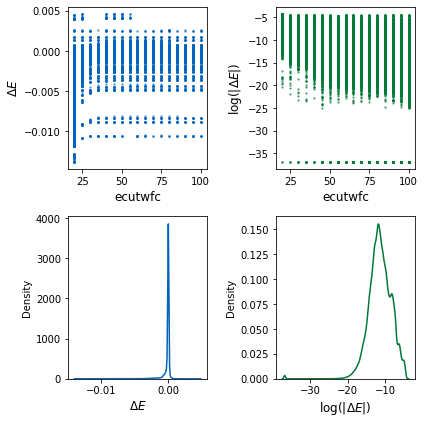

In [9]:
PLOT_PATH = os.path.join(PLOT_DIR, "delta_E_vs_log.png")
os.makedirs(PLOT_DIR, exist_ok=True)
fs = 12
fig, ax = plt.subplots(2, 2, figsize=(6,6))
ax[0, 0].scatter(data['ecutwfc'], data['delta_E'], s=2, alpha=0.5, c=blue)
ax[0, 1].scatter(data['ecutwfc'], data['log_abs_delta_E'], s=2, alpha=0.5, c=green)

ax[0, 0].set_xlabel("ecutwfc", fontsize=fs)
ax[0, 0].set_ylabel("$\\Delta E$", fontsize=fs)

ax[0, 1].set_xlabel("ecutwfc", fontsize=fs)
ax[0, 1].set_ylabel("$\\log(|\\Delta E$|)", fontsize=fs)

sns.kdeplot(data['delta_E'], ax=ax[1, 0], c=blue)
sns.kdeplot(data['log_abs_delta_E'], ax=ax[1, 1], c=green)

ax[1, 0].set_xlabel("$\\Delta E$", fontsize=fs)
ax[1, 1].set_xlabel("$\\log(|\\Delta E$|)", fontsize=fs)
plt.tight_layout()
plt.savefig(PLOT_PATH)
plt.show()